cost: 0.455383837223053
cost: 0.051885396242141724
cost: 0.03469112887978554
cost: 0.02383904904127121
cost: 0.017525341361761093
cost: 0.014315586537122726
cost: 0.01285638939589262
W: [[ 0.4848481   0.38269702 -0.16934419  0.7120173   0.6784562  -0.30408773
  -0.72142106  0.25820684  0.38787106 -0.44063523]] b: [-7.1701193e-01 -5.6607753e-01  0.0000000e+00  6.0605172e-02
  1.5925945e-04  0.0000000e+00  0.0000000e+00 -5.4872822e-02
 -5.7338387e-01  0.0000000e+00]


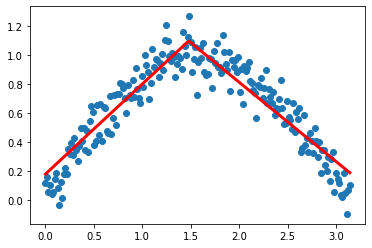

In [34]:
import keras
import numpy as np
import matplotlib.pyplot as plt
#Sequential 按顺序构成的模型
from keras.models import Sequential#Sequential是模型结构，输入层，隐藏层，输出层
#Dense 全连接层,Activation激活函数
from keras.layers import Dense,Activation
# from keras.optimizers import SGD

x_data=np.linspace(0,np.pi,200)#从-0.5到0.5范围内生成200个随机点
noise=np.random.normal(0,0.1,x_data.shape)#生成和x_data形状一样的噪声
y_data=np.sin(x_data)+noise

#显示随机点
#plt.scatter(x_data,y_data)
#plt.show()

#构建一个顺序模型
model=Sequential()

#1-10-1，添加一个隐藏层
model.add(Dense(units=10,input_dim=1,activation='relu'))#units是隐藏层，输出维度，输出y，input_dim是输入维度，输入x
#model.add(Activation('tanh'))#给这一层添加一个双曲正切激活函数tanh函数
model.add(Dense(units=1,input_dim=10,activation='relu'))#input_dim可以不写，它可以识别到上一句的输出是10维
#model.add(Activation('tanh'))#给这一层添加一个双曲正切激活函数tanh函数
# 优化器选择的是 sgd 随机梯度下降 损失函数 是mse 均方误差
model.compile(optimizer='sgd',loss='mse')
#定义优化器 导入不进来，我猜测是python版本太高了
# sgd=SGD(lr=0.3)#学习率提高到0.3，训练速度会加快

model.compile(optimizer='sgd',loss='mse')#编译这个模型，sgd是随机梯度下降法，优化器.mse是均方误差

#训练模型
for step in range(3001):
    #每次训练一个批次
    cost=model.train_on_batch(x_data,y_data)#代价函数的值，其实就是loss
    #每500个batch打印一次cost值
    if step %500==0:
        print('cost:',cost)

#打印权值和偏置值
W,b=model.layers[0].get_weights()#线性回归，只有一层
print('W:',W,'b:',b)

#x_data输入网络中，得到预测值y_pred
y_pred=model.predict(x_data)

#显示随机点s
plt.scatter(x_data,y_data)
#显示预测结果
plt.plot(x_data,y_pred,'r',lw=3)#r-表示红色的线，lw表示线宽
plt.show()

In [35]:
# 计算预测的分数
from sklearn.metrics import explained_variance_score
score=explained_variance_score(y_data,y_pred)
print('evs: %.2f%%'%(score*100.0))

evs: 87.06%
